# Assignment 1 - Question 2
_Mohamed Amine Arfaoui_

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import sgd


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(x_train.shape[0]))
print("- Test-set:\t\t{}".format(x_test.shape[0]))
print(" Shape of train target set:{}".format(y_train.shape))

Size of:
- Training-set:		60000
- Test-set:		10000
 Shape of train target set:(60000,)


Let's perform a one hot encoding on _y_train_ so that it have the sahpe (60000,10):

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(y_train.reshape(-1, 1))
y_train_onehot = enc.transform(y_train.reshape(-1, 1)).toarray()
y_train_onehot.shape

(60000, 10)

Same for _y_test_

In [6]:
enc = OneHotEncoder(categories='auto')
enc.fit(y_test.reshape(-1, 1))
y_test_onehot = enc.transform(y_test.reshape(-1, 1)).toarray()
y_test_onehot.shape

(10000, 10)

## Sequential Model


We create our sequential model by stacking layers:

In [7]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer 
model.add(InputLayer(input_shape=((28, 28))))

# Convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape((28, 28, 1)))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=512, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=128, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# Last fully-connected / dense layer with softmax-activation for use in classification.
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 14, 14, 512)       5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 512)         0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 4, 4, 128)         589952    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total para

In [9]:
optimizer = sgd(lr=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training

In [10]:
%%time
history = model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 305s 5ms/step - loss: 2.2100 - acc: 0.7824
Epoch 2/10
60000/60000 [==============================] - 324s 5ms/step - loss: 0.1550 - acc: 0.9524
Epoch 3/10
60000/60000 [==============================] - 346s 6ms/step - loss: 0.1138 - acc: 0.9644
Epoch 4/10
60000/60000 [==============================] - 331s 6ms/step - loss: 0.0937 - acc: 0.9712
Epoch 5/10
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0787 - acc: 0.9755
Epoch 6/10
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0691 - acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 328s 5ms/step - loss: 0.0615 - acc: 0.9815
Epoch 8/10
60000/60000 [==============================] - 328s 5ms/step - loss: 0.0558 - acc: 0.9833
Epoch 9/10
60000/60000 [==============================] - 330s 6ms/step - loss: 0.0509 - acc: 0.9852
Epoch 10/10
60000/60000 [==============================] - 334s 6ms/step - loss: 0.0462 - a

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Accuracy plot

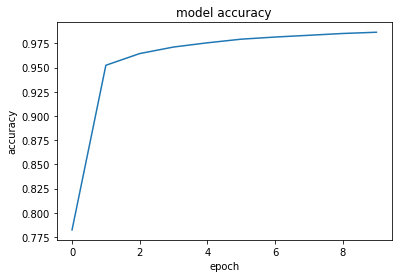

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

#### Loss plot

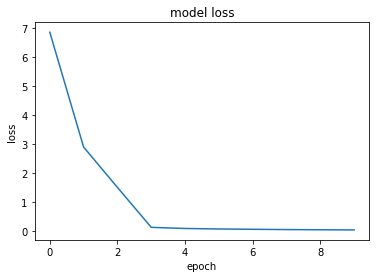

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Evaluation


In [13]:
result = model.evaluate(x_test, y_test_onehot)

10000/10000 [==============================] - 9s 924us/step


Performance metrics for the test-set.

In [14]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.07816724474669899
acc 0.9773
